# generate dataset

In [4]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [5]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [6]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
def categorize_by_percentile(values,percentile_list):
    # Compute percentiles
    # percentiles = np.percentile(values, [20, 40, 60, 80])
    # percentiles = np.percentile(values, [33,66])
    percentiles = np.percentile(values, percentile_list)
    # percentiles = np.percentile(values, [10,90])
    
    # Define labels
    # labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
    labels = ['sell', 'hold', 'buy']

    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)

    # could potentially have issue where 
    
    return categories

In [8]:
def add_target_cols(df):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[33,66])
        
        label_mapping = {
            'sell': 0, 
            'hold': 1, 
            'buy': 2, 
        }
        
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [9]:
df = add_target_cols(df)

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47732/3548565402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[33,66])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47732/3548565402.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47732/354856

In [10]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,34.439999,34.537498,34.380001,34.455002,34.455002,430096,0.000363,0.237227,0.377802,...,2.959740,-0.088659,-0.726666,-3.268206,-37.998322,-1.09,0.004199,CPRT,buy,2
1,2023-02-24 14:30:00-05:00,34.450001,34.634998,34.410000,34.599998,34.599998,694483,0.004199,0.199732,0.235099,...,-0.570454,0.152135,21.164271,35.817040,10.515641,-1.09,0.000434,CPRT,hold,1
2,2023-02-24 15:30:00-05:00,34.610001,34.634998,34.455002,34.615002,34.615002,456536,0.000434,-0.081993,-0.206727,...,-0.579874,0.162966,5.581055,16.741564,9.517186,-1.09,0.009417,CPRT,buy,2
3,2023-02-27 09:30:00-05:00,34.895000,35.020000,34.740002,34.942501,34.942501,181650,0.009417,-0.366788,-0.430730,...,0.050891,0.093693,0.346850,1.293227,2.683604,0.31,-0.006244,CPRT,sell,0
4,2023-02-27 10:30:00-05:00,34.930000,34.930000,34.695000,34.724998,34.724998,108775,-0.006244,-0.353070,-0.250925,...,2.594881,0.522353,1.372016,3.948259,5.474724,0.31,0.003019,CPRT,buy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89829,2024-07-30 10:30:00-04:00,542.359985,542.830017,536.010010,537.309998,537.309998,117746,-0.009097,-0.205348,-0.271500,...,0.427564,1.802676,2.948211,0.158709,-1.407738,0.68,-0.004262,ADBE,sell,0
89830,2024-07-30 11:30:00-04:00,537.315002,537.500000,534.090027,535.025024,535.025024,158915,-0.004262,0.023051,0.148807,...,0.367540,0.774850,1.330110,0.127913,-1.106407,0.68,-0.002953,ADBE,sell,0
89831,2024-07-30 12:30:00-04:00,535.000000,535.075012,530.950073,533.447510,533.447510,103838,-0.002953,-0.141859,-0.209615,...,0.503084,0.666744,1.036731,0.129455,-0.965861,0.68,0.005016,ADBE,buy,2
89832,2024-07-30 13:30:00-04:00,533.460022,537.239990,533.119995,536.130005,536.130005,108120,0.005016,-0.038202,0.020202,...,-3.047771,4.789196,3.074578,0.265889,-1.299145,0.68,-0.000354,ADBE,hold,1


In [11]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


# preprocess dataset

- set targets correctly (try 3 targets first)
    - plot the distribution pdf of the target values
      
- split train val test on time
    - within each split can shuffle
    - split directly on the df

- shortlist the target and features
** keep the df unchanged so dont need to run above code again

In [14]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((71867, 84), (8983, 84), (8984, 84))

In [15]:
train_df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-10 12:00:00+00:00,1619.500000,1625.500000,1615.000000,1625.000000,1625.000000,38967,0.003390,-0.156986,-0.213034,...,29.033343,-0.033365,-1.200842,-4.101547,45.477088,0.11,0.001537,III.L,buy,2
1,2023-02-10 12:00:00+00:00,106.360001,106.639999,106.199997,106.269997,106.269997,1318353,-0.000658,-0.007519,0.045017,...,1.028772,0.136904,-0.029851,-0.186527,-0.638538,0.11,0.004600,RR.L,buy,2
2,2023-02-10 12:00:00+00:00,153.437500,153.699997,153.000000,153.085007,153.085007,210932,-0.003243,-0.317099,-0.373950,...,1.165333,0.300798,-0.237521,-0.690568,-1.679347,0.11,0.001730,MKS.L,buy,2
3,2023-02-10 13:00:00+00:00,1625.500000,1631.000000,1617.982788,1627.500000,1627.500000,49544,0.001537,0.022851,0.119499,...,-2.899139,0.099350,-1.730039,-5.791475,21.748935,0.11,-0.001537,III.L,sell,0
4,2023-02-10 13:00:00+00:00,153.250000,153.899994,153.149994,153.350006,153.350006,206337,0.001730,-0.142110,-0.011012,...,2.664017,0.520411,-0.240000,-0.754125,-1.849107,0.11,0.000326,MKS.L,hold,1


In [16]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

# training mtd 1 - using all features

In [18]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [19]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [20]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [21]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [22]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0 23658]
 [    1 23540]
 [    2 24669]]
(74007, 72) (74007,)
[[    0 24669]
 [    1 24669]
 [    2 24669]]


In [23]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 2901]
 [   1 3178]
 [   2 2904]]
(9534, 72) (9534,)
[[   0 3178]
 [   1 3178]
 [   2 3178]]


In [24]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [25]:
from scripts.train_predict import *

# standardise the values

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((74007, 72), (74007,), (9534, 72), (9534,), (8984, 72), (8984,))

In [26]:
X_train[100],y_train[100]

(array([ 1.39192077e+00,  3.42807168e+00,  9.55247326e-01,  5.30530287e-01,
        -3.17946977e-02, -2.56186976e-01, -1.77380876e-01,  4.73189378e-01,
         9.66273627e-01,  1.47176738e-01,  1.29660529e+00,  1.21473257e+00,
         2.09092088e+00, -1.89374962e-01, -5.42098392e-01,  5.11699168e-01,
         9.09560105e-01,  1.13038657e+00,  1.46723376e+00,  1.42762426e+00,
         1.70075784e+00, -2.68483081e-01, -3.91561240e-01,  5.37078418e-01,
         1.24514916e+00,  1.23714222e+00,  1.45522740e+00,  1.50693740e+00,
         1.62522574e+00, -3.08363028e-01, -5.24910526e-01,  5.53008443e-01,
         1.74818557e+00,  2.18943180e+00,  1.24803620e+00,  1.20797577e+00,
         1.22620092e+00, -4.35624652e-01, -6.86622690e-01,  5.58450983e-01,
         1.86698877e+00,  1.57161479e+00,  9.25099167e-01,  8.28297169e-01,
         9.96369835e-01, -5.28593383e-01, -7.72670386e-01,  5.42418540e-01,
         1.47271520e+00,  1.27547147e+00,  5.90985201e-01,  5.25002063e-01,
         6.2

In [27]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [28]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.3958464
|████████████████████████████████████████| 1/1 [100%] in 39.2s (0.03/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.39585


accuracy: 36.45


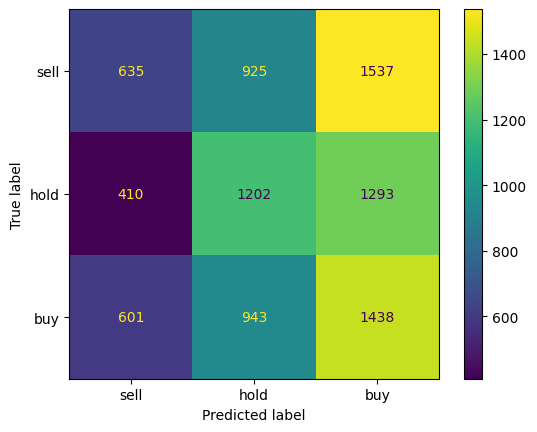

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [30]:
## predict on indiv stocks
## using all features

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()


    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 36.95
MDB: 35.74
MU: 38.55
ADBE: 35.34
TTD: 37.75
PDD: 34.94
META: 34.94
WDAY: 31.85
CRWD: 30.65
SMCI: 33.47
ZS: 41.53
NVDA: 34.68
AMZN: 33.87
TEAM: 32.66
AMAT: 33.47
MRNA: 31.85
DDOG: 33.87
INTC: 40.73
PANW: 34.27
CPRT: 36.69
INTU: 31.85
BKNG: 29.84
SNPS: 33.47
ABNB: 32.66
AVGO: 35.08
AMD: 31.85
MSFT: 30.24
MELI: 36.69
DASH: 33.47
CDNS: 33.06
LRCX: 37.1
MRVL: 37.9
III.L: 35.16
MKS.L: 34.87
RR.L: 29.97


# training mtd 2 - using SelectKBest(10)

In [32]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [33]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [34]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [35]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [36]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0 23658]
 [    1 23540]
 [    2 24669]]
(74007, 72) (74007,)
[[    0 24669]
 [    1 24669]
 [    2 24669]]


In [37]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 2901]
 [   1 3178]
 [   2 2904]]
(9534, 72) (9534,)
[[   0 3178]
 [   1 3178]
 [   2 3178]]


In [38]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [39]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((74007, 10), (74007,), (9534, 10), (9534,), (8984, 10), (8984,))

In [40]:
X_train[0],y_train[0]

(array([-0.07289602, -0.85065104, -0.93907913, -0.78292349, -1.0566942 ,
        -1.1174912 , -1.20167569, -1.10701521, -1.08957676,  0.05642769]),
 2)

In [41]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [42]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4078037
|████████████████████████████████████████| 1/1 [100%] in 2.2s (0.46/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.4078


accuracy: 37.6


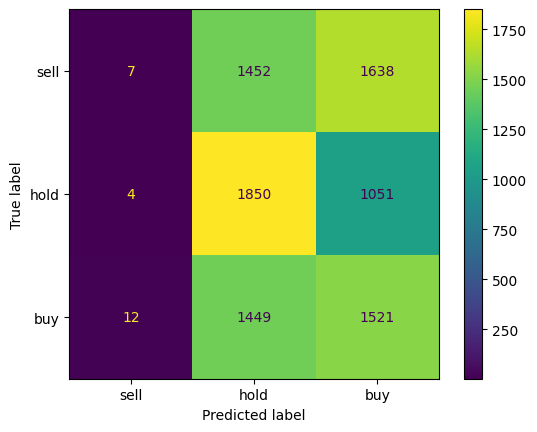

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [44]:
## predict on indiv stocks
## selectKbest only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = selector.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 32.53
MDB: 33.33
MU: 34.94
ADBE: 33.33
TTD: 39.76
PDD: 40.16
META: 35.74
WDAY: 41.94
CRWD: 37.1
SMCI: 35.48
ZS: 38.71
NVDA: 34.68
AMZN: 34.27
TEAM: 43.95
AMAT: 34.68
MRNA: 36.69
DDOG: 40.73
INTC: 35.48
PANW: 35.48
CPRT: 33.47
INTU: 41.13
BKNG: 39.11
SNPS: 41.13
ABNB: 43.55
AVGO: 35.48
AMD: 33.87
MSFT: 39.92
MELI: 41.94
DASH: 31.45
CDNS: 33.47
LRCX: 35.48
MRVL: 37.5
III.L: 34.29
MKS.L: 34.58
RR.L: 37.18


# training mtd 3 - using PCA(0.95)

In [46]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [47]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [48]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [49]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [50]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0 23658]
 [    1 23540]
 [    2 24669]]
(74007, 72) (74007,)
[[    0 24669]
 [    1 24669]
 [    2 24669]]


In [51]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 2901]
 [   1 3178]
 [   2 2904]]
(9534, 72) (9534,)
[[   0 3178]
 [   1 3178]
 [   2 3178]]


In [52]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [53]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((74007, 26), (74007,), (9534, 26), (9534,), (8984, 26), (8984,))

In [54]:
X_train[0],y_train[0]

(array([ 0.51059865, -3.36165871,  2.21653831,  0.67535613,  4.20005859,
        -1.34445844,  1.13259069,  0.54898728, -0.54056859,  0.27972097,
        -0.11053488,  0.16214234,  0.03097221, -0.11377357, -0.11676201,
        -0.03668764,  0.52146895, -0.49289348, -0.63733521, -0.94474988,
        -0.39748257,  0.29309084,  0.53884196, -0.51655565, -0.2796573 ,
        -0.43638034]),
 2)

In [55]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [56]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.3965807
|████████████████████████████████████████| 1/1 [100%] in 4.0s (0.25/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.39658


accuracy: 37.71


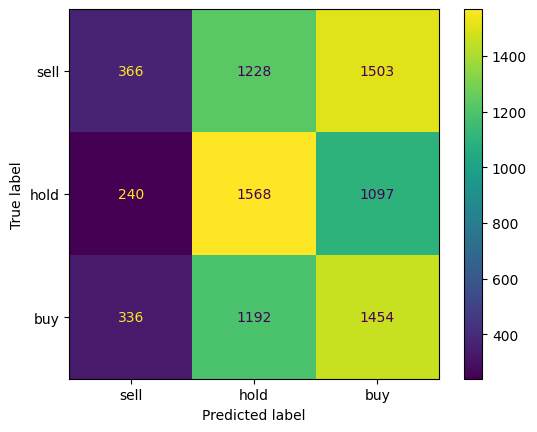

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [58]:
## predict on indiv stocks
## pca transformed features only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 36.14
MDB: 34.14
MU: 33.73
ADBE: 34.94
TTD: 33.33
PDD: 34.54
META: 36.14
WDAY: 35.89
CRWD: 35.08
SMCI: 34.27
ZS: 34.27
NVDA: 31.05
AMZN: 29.44
TEAM: 37.9
AMAT: 35.48
MRNA: 34.68
DDOG: 29.44
INTC: 36.29
PANW: 34.68
CPRT: 33.47
INTU: 30.65
BKNG: 31.05
SNPS: 39.92
ABNB: 39.11
AVGO: 37.5
AMD: 32.26
MSFT: 33.06
MELI: 36.69
DASH: 25.4
CDNS: 36.29
LRCX: 36.69
MRVL: 33.87
III.L: 34.29
MKS.L: 33.72
RR.L: 32.56


# use model to predict on individual stocks

In [60]:
best_model

MLPClassifier(alpha=0.0005, hidden_layer_sizes=32, learning_rate='adaptive',
              max_iter=1000)

In [61]:
for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 36.14
MDB: 34.14
MU: 33.73
ADBE: 34.94
TTD: 33.33
PDD: 34.54
META: 36.14
WDAY: 35.89
CRWD: 35.08
SMCI: 34.27
ZS: 34.27
NVDA: 31.05
AMZN: 29.44
TEAM: 37.9
AMAT: 35.48
MRNA: 34.68
DDOG: 29.44
INTC: 36.29
PANW: 34.68
CPRT: 33.47
INTU: 30.65
BKNG: 31.05
SNPS: 39.92
ABNB: 39.11
AVGO: 37.5
AMD: 32.26
MSFT: 33.06
MELI: 36.69
DASH: 25.4
CDNS: 36.29
LRCX: 36.69
MRVL: 33.87
III.L: 34.29
MKS.L: 33.72
RR.L: 32.56
